# Classify BC tumors based upon measured variables

## Import libraries

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report


In [4]:
# Load the breast cancer dataset
data = load_breast_cancer()
X = data.data[:, [data.feature_names.tolist().index('mean concave points'), data.feature_names.tolist().index('mean perimeter')]]
y = data.target

In [5]:
# Load the breast cancer dataset
data = load_breast_cancer()
feature_names = data.feature_names.tolist()

# Find the indices of 'mean concave points' and 'mean perimeter'
mean_concave_points_idx = feature_names.index('mean concave points')
mean_perimeter_idx = feature_names.index('mean perimeter')

# Create a NumPy array containing only the specified variables
X = data.data[:, [mean_concave_points_idx, mean_perimeter_idx]]

y = data.target


In [8]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)



## Gaussian Naive Bayes Classifier

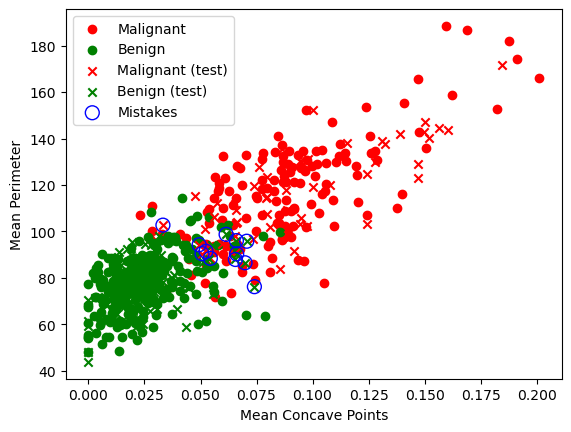

Confusion Matrix:
 [[49  5]
 [ 7 82]]
Accuracy Score: 0.916083916083916
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.91      0.89        54
           1       0.94      0.92      0.93        89

    accuracy                           0.92       143
   macro avg       0.91      0.91      0.91       143
weighted avg       0.92      0.92      0.92       143



In [9]:
# Train the Naive Bayes classifier
clf = GaussianNB()
clf.fit(X_train, y_train)

# Make predictions for the test set
y_pred = clf.predict(X_test)

# Plot the training data
plt.scatter(X_train[y_train == 0, 0], X_train[y_train == 0, 1], 
            color='r', marker='o', label='Malignant')
plt.scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1], 
            color='g', marker='o', label='Benign')

# Plot the test data
plt.scatter(X_test[y_test == 0, 0], X_test[y_test == 0, 1], 
            color='r', marker='x', label='Malignant (test)')
plt.scatter(X_test[y_test == 1, 0], X_test[y_test == 1, 1], 
            color='g', marker='x', label='Benign (test)')

# Plot the mistakes in the test data
plt.scatter(X_test[y_test != y_pred, 0], X_test[y_test != y_pred, 1], 
            color='b', marker='o', facecolors='none', s=100, 
            linewidths=1, label='Mistakes')

plt.xlabel('Mean Concave Points')
plt.ylabel('Mean Perimeter')
plt.legend()
plt.show()

# Print the confusion matrix, accuracy score, and classification report
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


---

In [10]:
## Nearest neighbor

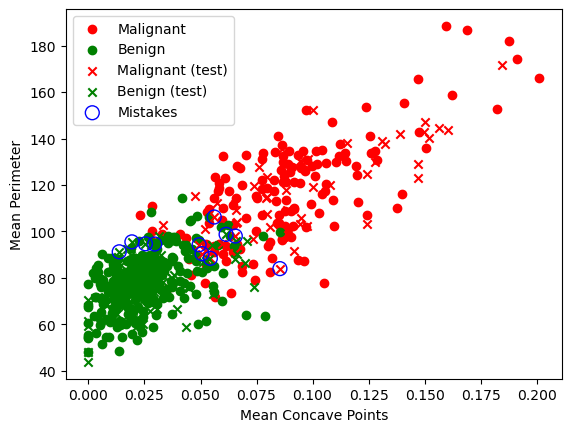

Confusion Matrix:
 [[48  6]
 [ 5 84]]
Accuracy Score: 0.9230769230769231
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.89      0.90        54
           1       0.93      0.94      0.94        89

    accuracy                           0.92       143
   macro avg       0.92      0.92      0.92       143
weighted avg       0.92      0.92      0.92       143



In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Train the k=3 nearest neighbor classifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Make predictions for the test set
y_pred = knn.predict(X_test)

# Plot the training data
plt.scatter(X_train[y_train == 0, 0], X_train[y_train == 0, 1], color='r', marker='o', label='Malignant')
plt.scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1], color='g', marker='o', label='Benign')

# Plot the test data
plt.scatter(X_test[y_test == 0, 0], X_test[y_test == 0, 1], color='r', marker='x', label='Malignant (test)')
plt.scatter(X_test[y_test == 1, 0], X_test[y_test == 1, 1], color='g', marker='x', label='Benign (test)')

# Plot the mistakes in the test data
plt.scatter(X_test[y_test != y_pred, 0], X_test[y_test != y_pred, 1], color='b', marker='o', facecolors='none', s=100, linewidths=1, label='Mistakes')

plt.xlabel('Mean Concave Points')
plt.ylabel('Mean Perimeter')
plt.legend()
plt.show()

# Print the confusion matrix, accuracy score, and classification report
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
